In [4]:
%%html
<h3>Logistic regression</h3>
It is primarily used for binary classification tasks. The sigmoid function is the objective function of the logistic regression.
It outputs one if the probability is greater than a threshold(typically 50%) or it outputs as zero.
<img src="images/sigmoid.jpeg" width=600 />



In [9]:
%%HTML

The squared cost function for logistic regression shows many local minima, which is not ideal for gradient descent due to non convex nature when we use squared error loss as shown below:
<img src="images/convex.png" width=400 />
In order to preserve the convex nature for the loss function, a log loss error function has been designed for logistic regression. 
The cost function is split for two cases y=1 and y=0.
<img src="images/logistic1.png" width=400 />
Combining both the equation we get a convex log loss function as shown below-
<img src="images/logistic2.png" width=400 />

In [10]:
%%html 
We can apply the gradient descent alogirthm to fit a best suited model on the data.
<img src="images/cost_lr3.jpg" width=400 />

In [14]:
%%HTML
When we take the partial derivative of the above cost function, we can get the formula below:
<img src="images/gd_logitstic.jpeg" width=400 />
If it's a multivariate problem, then j = 1 to n as we need to optimise the weights of n features. 
If it is a univariate problem, then j=1 as there is only one feature and one weight has to be optimises

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris.data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
X = iris.data[['petal width (cm)']]
X

,petal width (cm)
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2
...,...
145,2.3
146,1.9
147,2.0
148,2.3


In [42]:
Y = iris.target
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=42)

In [44]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [46]:
log_reg.predict([[5]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [49]:
%%HTML
<h3>Softmax Regression</h3>
Softmax regression (or multinomial logistic regression) is a generalization of logistic regression to the case where we want to handle multiple classes(Multiple class classification). In logistic regression we assumed that the labels were binary: y(i)∈{0,1}
. We used such a classifier to distinguish between two kinds of hand-written digits. Softmax regression allows us to handle y(i)∈{1,…,K}
 where K
 is the number of classes.
<br/>
<br/>
We can use the LogisticRegression method to compute the SoftmaxRegression. If we have multiple classes in the data(target), 
then Logistic regression function automatically chooses softmax regression

<br/>
<br/>
Entropy is a measure of disorder/ uncertainty. In softmax regression, we use cross-entropy loss. 
The cross-entropy loss will be smaller if the two distributions(ground truth distribution and predicted distribution) are similar. It means that uncertainty or disorder is less.
The loss is higher the distributions do not match. 

<br/>

Softmax function returns the probability of being true for each class. The sum of all classes' probabilities will be equal to one. 
Then we can say that it's a predicted discrete distribution. In the case of ground truth, one class will be 1 and the rest are zero. 
We can also form a discrete probability for the ground truth. Then we can use cross entropy to compare these two discrete distributions and guide the optimisation.    

In [67]:
%%html
<h3>Naive Bayes classification</h3>
Conditional probability - The probability of observing some event(say x) given some other event(say y), wriiten as p(x|y).
<br/>
<br/>
The posterior probability is a type of conditional probability that results from updating the prior probability with information summarized by the likelihood via an application of Bayes' rule.
If the conditional probability is p(x|y), then the posterior probability of p(y|x).
<br/>
<br/>
The prior probability is the probability of an event before new data is collected.
<br/>
<br/>

<img src="images/nb.jpg" width=400 />

Here x_n(n is the number of features) can be data and y can be class.
<br/>
The key to Naive Bayes is that there is a big assumption that the conditional probability of a vector of predictor/feature values, 
given observing an outcome, is sufficiently well estimated by the product of the individual conditional probabilities. In other words,
to estimate p(data|class) which is equivalent to p(x_n|y) and can be rewritten as p(x1,x2,x3....x_n|y), 
we can compute each p(x_i|y) where i<=n and then take the product of all the individual probabilities.
<img src="images/nb1.png" width=700 />
<img src="images/nb2.png" width=400 />


In [98]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

In [99]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [100]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [101]:
predicted = nb.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 2
Predicted Value: 2


In [102]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = nb.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
f1

0.8411893823306714

In [103]:
precision_score(y_test, y_pred, average="weighted")

0.8453180195401309

In [104]:
recall_score(y_test, y_pred, average="weighted")

0.8409090909090909

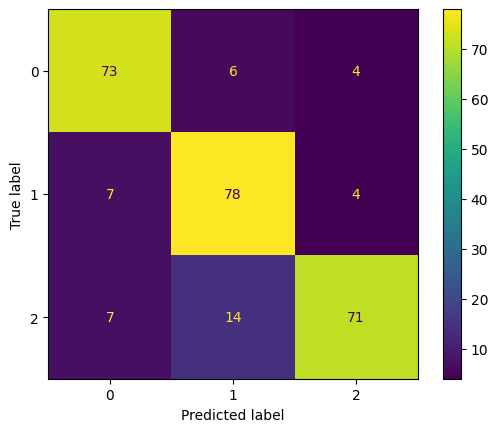

In [105]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();